# **(ADD THE NOTEBOOK NAME HERE)**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ewa\\Documents\\vscode-projects\\Rest_Wellness_and_Lifestyle\\02_jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("Rest_wellness_and_lifestyle")

Rest_wellness_and_lifestyle


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Ewa\\Documents\\vscode-projects\\Rest_Wellness_and_Lifestyle'

# Section 1

Section 1 content

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

---

# Section 2

Section 2 content

In [6]:
# Load cleaned dataset
df = pd.read_csv("/Users/Ewa/Documents/vscode-projects/Rest_Wellness_and_Lifestyle/01_data/Sleep_health_and_lifestyle_cleaned_dataset.csv")

Null Hypothesis (H₀): There is no significant difference in blood pressure and heart rate between individuals with and without sleep disorders.
Alternative Hypothesis (H₁): There is a significant difference in blood pressure and heart rate between individuals with and without sleep disorders.

Since we are comparing two independent groups (with and without sleep disorders) on numerical variables (blood pressure, heart rate), we can use:
Independent t-test if the data is normally distributed.
Mann-Whitney U test if the data is not normally distributed (non-parametric alternative).
Levene’s test to check for equal variances before applying the t-test.
Check Normality Assumption:

Use the Shapiro-Wilk test or visualize with histograms/QQ plots.
Conduct Statistical Tests:

Apply the t-test (or Mann-Whitney U test) to compare means.
A p-value < 0.05 would indicate a statistically significant difference.


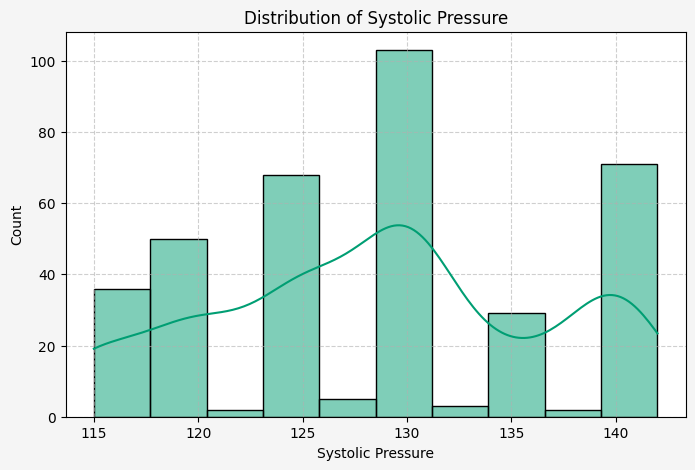

Systolic Pressure - Shapiro-Wilk test p-value: 8.484982234624851e-13
Systolic Pressure does not appear to be normally distributed.


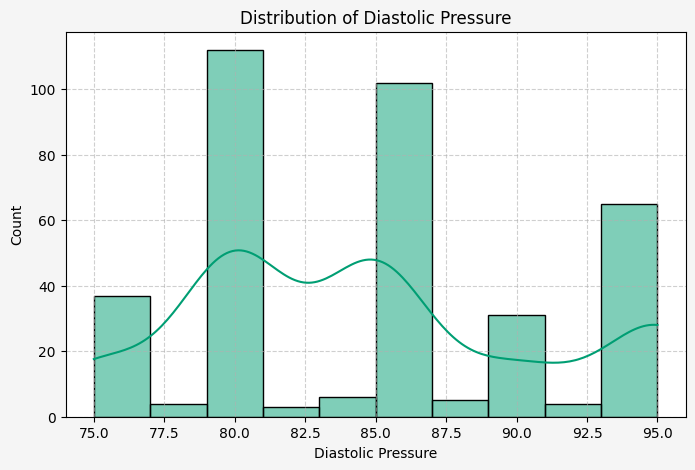

Diastolic Pressure - Shapiro-Wilk test p-value: 1.938445938276568e-15
Diastolic Pressure does not appear to be normally distributed.


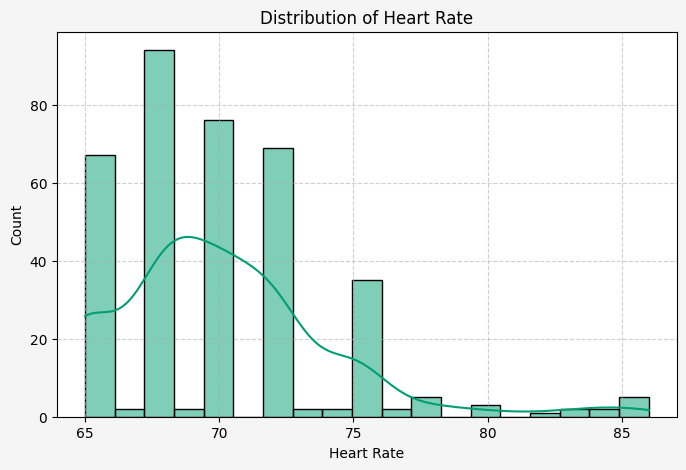

Heart Rate - Shapiro-Wilk test p-value: 1.593859821910398e-16
Heart Rate does not appear to be normally distributed.
Systolic Pressure - Skipped - Not enough data: p-value = None
Diastolic Pressure - Skipped - Not enough data: p-value = None
Heart Rate - Skipped - Not enough data: p-value = None


In [21]:
# Categorizing individuals based on sleep disorder status
df['Has Sleep Disorder'] = df['Sleep Disorder'].apply(lambda x: 'Yes' if x != 'None' else 'No')

# Define a color-blind friendly palette
color_palette = {'Yes': '#E69F00', 'No': '#56B4E9'}  # Orange and Blue

# Box plot for Systolic Pressure
fig1 = px.box(df, x='Has Sleep Disorder', y='Systolic Pressure',
              title='Systolic Blood Pressure vs Sleep Disorder',
              color='Has Sleep Disorder',
              color_discrete_map=color_palette)
fig1.update_layout(plot_bgcolor='#F5F5F5')  # Light gray background
fig1.show()

# Box plot for Diastolic Pressure
fig2 = px.box(df, x='Has Sleep Disorder', y='Diastolic Pressure',
              title='Diastolic Blood Pressure vs Sleep Disorder',
              color='Has Sleep Disorder',
              color_discrete_map=color_palette)
fig2.update_layout(plot_bgcolor='#F5F5F5')
fig2.show()

# Box plot for Heart Rate
fig3 = px.box(df, x='Has Sleep Disorder', y='Heart Rate',
              title='Heart Rate vs Sleep Disorder',
              color='Has Sleep Disorder',
              color_discrete_map=color_palette)
fig3.update_layout(plot_bgcolor='#F5F5F5')
fig3.show()

# Check distribution using histograms and Shapiro-Wilk test
def check_distribution(variable):
    plt.figure(figsize=(8, 5), facecolor='#F5F5F5')  # Set background color
    sns.histplot(df[variable], kde=True, color='#009E73')  # Green for contrast
    plt.title(f'Distribution of {variable}')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()
    
    if len(df[variable]) >= 3:
        stat, p_value = stats.shapiro(df[variable])
        print(f"{variable} - Shapiro-Wilk test p-value: {p_value}")
        if p_value > 0.05:
            print(f"{variable} appears to be normally distributed.")
        else:
            print(f"{variable} does not appear to be normally distributed.")
    else:
        print(f"{variable} has too few data points for normality test. Assuming non-normal distribution.")

# Check distributions
check_distribution('Systolic Pressure')
check_distribution('Diastolic Pressure')
check_distribution('Heart Rate')

# Statistical validation
def perform_stat_tests(variable):
    group1 = df[df['Has Sleep Disorder'] == 'Yes'][variable]
    group2 = df[df['Has Sleep Disorder'] == 'No'][variable]
    
    if len(group1) >= 3 and len(group2) >= 3:
        # Normality test
        stat, p_normal1 = stats.shapiro(group1)
        stat, p_normal2 = stats.shapiro(group2)
        
        if p_normal1 > 0.05 and p_normal2 > 0.05:
            # If both groups are normally distributed, use t-test
            stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)
            test_used = "T-test"
        else:
            # Otherwise, use Mann-Whitney U test
            stat, p_value = stats.mannwhitneyu(group1, group2)
            test_used = "Mann-Whitney U test"
    else:
        p_value = None
        test_used = "Skipped - Not enough data"
    
    print(f"{variable} - {test_used}: p-value = {p_value}")

# Perform tests for Systolic Pressure, Diastolic Pressure, and Heart Rate
perform_stat_tests('Systolic Pressure')
perform_stat_tests('Diastolic Pressure')
perform_stat_tests('Heart Rate')





Systolic Blood Pressure vs. Sleep Disorder
Individuals with sleep disorders tend to have higher systolic blood pressure readings.

Those with insomnia often show systolic pressure in the range of 130-135 mmHg.

Sleep apnea patients frequently have systolic readings of 135-140 mmHg.

People without sleep disorders generally have lower systolic pressure, often in the 120-125 mmHg range.

Diastolic Blood Pressure vs. Sleep Disorder
There is a similar trend with diastolic blood pressure, where sleep disorder patients have higher readings.

Insomnia sufferers commonly have diastolic pressure around 85-90 mmHg.

Sleep apnea is associated with diastolic readings of 88-90 mmHg.

Those without sleep disorders typically have lower diastolic pressure, often between 80-85 mmHg.

Heart Rate vs. Sleep Disorder
Heart rate appears to be elevated in individuals with sleep disorders.

People with insomnia or sleep apnea often have heart rates in the range of 75-85 beats per minute.

Individuals without sleep disorders tend to have lower heart rates, typically between 68-72 beats per minute.

These observations suggest a potential correlation between sleep disorders and elevated blood pressure and heart rate.

In [20]:
# Define variables to compare
variables = ['Systolic Pressure', 'Diastolic Pressure', 'Heart Rate']

# Color-blind-friendly palette
color_map = {'Yes': '#440154', 'No': '#21918c'}  # Viridis color scheme

# Create box plots
for var in variables:
    fig = px.box(df, x='Has Sleep Disorder', y=var, color='Has Sleep Disorder',
                 color_discrete_map=color_map, title=f'{var} vs Sleep Disorder',
                 points="all", template='plotly_white')
    fig.update_layout(plot_bgcolor='lightgrey')
    fig.show()

# Create violin plots
for var in variables:
    fig = px.violin(df, x='Has Sleep Disorder', y=var, color='Has Sleep Disorder',
                    color_discrete_map=color_map, box=True, points="all",
                    title=f'{var} Distribution by Sleep Disorder', template='plotly_white')
    fig.update_layout(plot_bgcolor='lightgrey')
    fig.show()

# Create histograms with KDE
for var in variables:
    fig = px.histogram(df, x=var, color='Has Sleep Disorder', marginal='violin',
                       nbins=30, histnorm='density', barmode='overlay',
                       color_discrete_map=color_map, title=f'{var} Distribution by Sleep Disorder',
                       template='plotly_white')
    fig.update_layout(plot_bgcolor='lightgrey')
    fig.show()

# Create ECDF plots
for var in variables:
    fig = px.ecdf(df, x=var, color='Has Sleep Disorder',
                  color_discrete_map=color_map, title=f'Cumulative Distribution of {var} by Sleep Disorder',
                  template='plotly_white')
    fig.update_layout(plot_bgcolor='lightgrey')
    fig.show()

Null Hypothesis (H₀):
Individuals classified as obese do not have lower sleep quality compared to those with normal BMI. 
Alternative Hypothesis (H₁):
Individuals classified as obese have lower sleep quality compared to those with normal BMI.

---

              count      mean       std  min  25%  50%  75%  max
BMI Category                                                    
Normal        216.0  7.638889  0.997283  5.0  7.0  8.0  8.0  9.0
Obese          10.0  6.400000  1.897367  4.0  4.5  7.0  7.0  9.0
Overweight    143.0  6.951049  1.223759  5.0  6.0  7.0  7.0  9.0
Shapiro-Wilk Test for Overweight: W=0.7598, p=0.0000
Shapiro-Wilk Test for Normal: W=0.8502, p=0.0000
Shapiro-Wilk Test for Obese: W=0.8602, p=0.0767


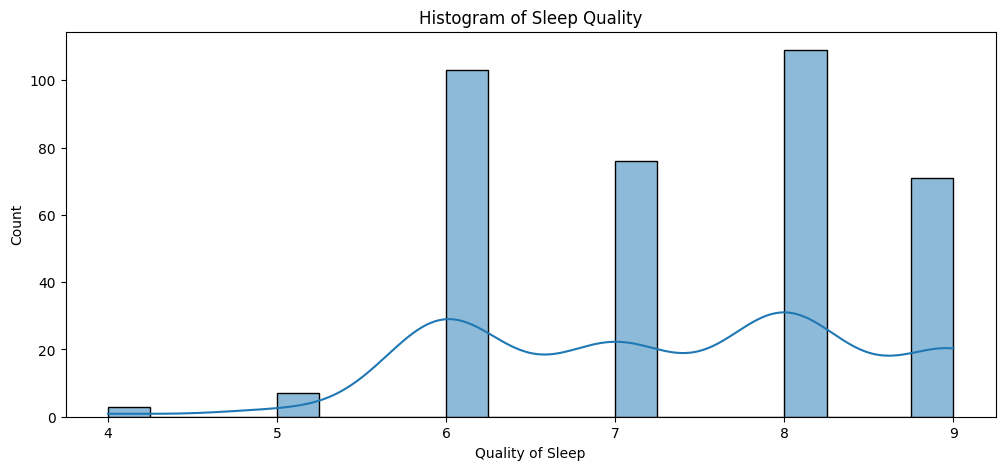

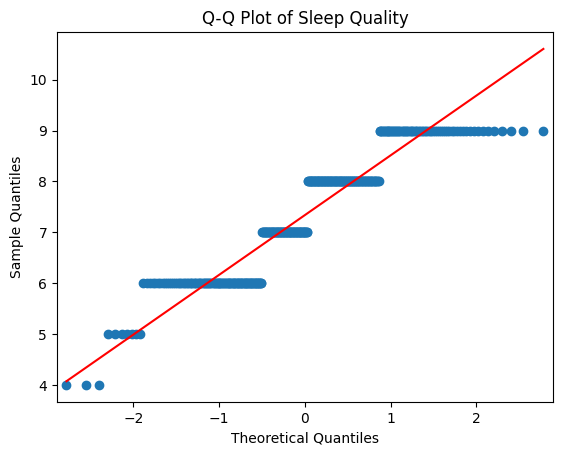

ANOVA p-value: 0.0000
Significant difference found, performing post-hoc Tukey's HSD Test.
  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1   group2   meandiff p-adj  lower   upper  reject
-------------------------------------------------------
Normal      Obese  -1.2389 0.002 -2.0912 -0.3865   True
Normal Overweight  -0.6878   0.0 -0.9719 -0.4038   True
 Obese Overweight    0.551  0.29 -0.3109   1.413  False
-------------------------------------------------------


In [28]:
# Define a colorblind-friendly palette
colorblind_palette = {"Normal": "#377eb8", "Overweight": "#4daf4a", "Obese": "#e41a1c"}

# Box Plot: Sleep Quality vs. BMI Category
fig_box = px.box(df, x="BMI Category", y="Quality of Sleep", color="BMI Category",
                 color_discrete_map=colorblind_palette,
                 title="Distribution of Sleep Quality by BMI Category")
fig_box.show()

# Violin Plot: Sleep Quality vs. BMI Category
fig_violin = px.violin(df, x="BMI Category", y="Quality of Sleep", color="BMI Category",
                        box=True, points="all", color_discrete_map=colorblind_palette,
                        title="Sleep Quality Density by BMI Category")
fig_violin.show()

# Bar Chart with Mean and Error Bars
fig_bar = px.bar(df.groupby("BMI Category")[["Quality of Sleep"]].mean().reset_index(),
                 x="BMI Category", y="Quality of Sleep", color="BMI Category",
                 color_discrete_map=colorblind_palette,
                 title="Average Sleep Quality by BMI Category", 
                 error_y=df.groupby("BMI Category")["Quality of Sleep"].std())
fig_bar.show()

# Generate Summary Statistics for Sleep Quality by BMI Category
sleep_quality_summary = df.groupby("BMI Category")["Quality of Sleep"].describe()
print(sleep_quality_summary)

# Test for Normality using Shapiro-Wilk Test (for each BMI category)
for category in df["BMI Category"].unique():
    stat, p = stats.shapiro(df[df["BMI Category"] == category]["Quality of Sleep"])
    print(f"Shapiro-Wilk Test for {category}: W={stat:.4f}, p={p:.4f}")

# Histogram & Q-Q Plot for Visual Inspection
plt.figure(figsize=(12,5))
sns.histplot(df["Quality of Sleep"], kde=True, bins=20)
plt.title("Histogram of Sleep Quality")
plt.show()

import statsmodels.api as sm
sm.qqplot(df["Quality of Sleep"], line='s')
plt.title("Q-Q Plot of Sleep Quality")
plt.show()

# Test for Statistical Significance: ANOVA (if normal) or Kruskal-Wallis Test
anova_p = stats.f_oneway(
    df[df["BMI Category"] == "Normal"]["Quality of Sleep"],
    df[df["BMI Category"] == "Overweight"]["Quality of Sleep"],
    df[df["BMI Category"] == "Obese"]["Quality of Sleep"]
)[1]
print(f"ANOVA p-value: {anova_p:.4f}")

if anova_p < 0.05:
    print("Significant difference found, performing post-hoc Tukey's HSD Test.")
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    tukey = pairwise_tukeyhsd(df["Quality of Sleep"], df["BMI Category"])
    print(tukey)


Normal BMI:

Mean sleep quality: 7.64 (highest among groups)
Standard deviation: 0.99 (less variability)
Most values range between 7-8
Overweight:

Mean sleep quality: 6.95 (lower than Normal BMI)
Standard deviation: 1.22
Sleep quality mostly around 6-7
Obese:

Mean sleep quality: 6.40 (lowest)
Standard deviation: 1.90 (highest variability)
Wider range from 4-9, with lower median values
Key Takeaways:
Individuals with normal BMI tend to have better sleep quality on average.
Obese individuals show lower sleep quality and higher variability in sleep scores.
Overweight individuals have intermediate sleep quality between normal and obese groups.

These findings suggest a negative correlation between BMI and sleep quality, with obesity being associated with poorer sleep. 

To test the statistical accuracy of the differences in sleep quality across BMI categories, we can use ANOVA (Analysis of Variance) if data is normally distributed, or Kruskal-Wallis test if it's not. Additionally, post-hoc tests like Tukey’s HSD can determine which groups differ significantly.


NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [ ]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)
